# Intro to statistics with `R`

This is your first exercise notebook. 
The exercises are similar to what you have seen in lab and practice notebook with a few exercises designed to be a bit challenging. 
You should explore and find commands to solve the exercises.   

Again much of the content will be similar to your lab, [Lab1_Histograms_and_Zscore](../labs/lab1_intro_to_stats.ipynb) and other practice book,[Traditional statistics practice with R](../practices/practice_wine.ipynb). 
Both notebooks will help you as a guide post in working out the solutions. 

As an added bonus, within this notebook we provide sample R code that commits your work to version control system (VCS).
We will discuss this VCS later.
Basically, you will create point-in-time saved versions of your notebook.

## Read in the Data

For this exercise we will use some Bike Share data.

In [16]:
bikeshare_hour <- read.csv('../../../datasets/bikeshare/hour.csv')
head(bikeshare_hour)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


**Activity 1**: Find the dimensions (the number of rows and columns) of the data frame.

In [2]:
# Code for Activity 1 goes here 
dim(bikeshare_hour)

[1] 17379    17

**Activity 2**: Display the ***last*** 10 columns of the data frame.

In [59]:
# Code for Activity 2 goes here
last_columns<-bikeshare_hour[c(0,8:17)]
head(last_columns)

weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


**Activity 3**: Run summary command learnt in lab and identify each variable if its categorical or numerical.

In [23]:
# Code for Activity 3 goes here 
summary(bikeshare_hour)


    instant             dteday          season            yr        
 Min.   :    1   2011-01-01:   24   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   2011-01-08:   24   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   2011-01-09:   24   Median :3.000   Median :1.0000  
 Mean   : 8690   2011-01-10:   24   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   2011-01-13:   24   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   2011-01-15:   24   Max.   :4.000   Max.   :1.0000  
                 (Other)   :17235                                   
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.  

````

    Answer for activity 3
    
----

````

# Bonus material: Using Version Control to Snapshot our Work

The commands below will interface to the underlying version control system (VCS).
In the DSA program we use Git.

** Save your notebook **

In [8]:
# JUST RUN ME ... and Read
# Load the library interfcae
library(git2r)

# Get the repository as an Object in R.  The '..' elements mean parent directory. 
# Note '.' represents the current directory "exercises"
# So, relative to this file: StatMath/modules/module1/exercises/exercises.ipynb
    .. = DSA-8610_10267106/modules/module1
    ../.. = DSA-8610_10267106/modules
    ../../.. = DSA-8610_10267106/
repo <- repository('../../..')

# Add this file to be tracked for changes
# The first parameter is the Repository object created in the above command
# The second parameter is the file we want to record history of changes for
add(repo, 'exercises.ipynb')

# Write a snapshot of any files we are currently tracking into the VCS
# The first parameter is the Repository object created in the above command
# The second parameter is the brief message
commit(repo,"This is my first commit, Activities 1-3")

ERROR: Error in parse(text = x, srcfile = src): <text>:8:18: unexpected input
7: # So, relative to this file: StatMath/modules/module1/exercises/exercises.ipynb
8:     .. = DSA-8610_
                    ^



When ever you see the cells with library(git2r) in your exercises, you can just run them.

---
** Back to Exercises **

So what is the most common type of weather that happens?

**Activity 4**: Find out the most common type of weather that occurs in the dataset.

In [37]:
unique(bikeshare_hour$weathersit)

[1] 6 0 1 2 3 4 5

In [32]:
# Code for Activity 4 goes here -----------------------
library(dplyr)

bikeshare_hour %>% 
    group_by(weathersit) %>% 
    summarise(max(cnt))

weathersit,max(cnt)
1,977
2,957
3,891
4,164


We have seen how to calculate z-score in the lab and how to use it in testing a hypothesis. Let’s say, we want to check the significance of variable weekday for hypothesis testing. Assume that monday(weekday 1) has more bike shares than average population bike shares on any other day

So our null hypothesis H0 is, there is no significant difference in the number of bike shares for any day of the week

Our alternate hypothesis H1 is, there is a better chance of monday having more bike shares than average bike shares on other days

**Activity 5.a**: Calculate the z-score.

In [34]:
# Code for Activity 5 goes here -----------------------
z.score = function(sam, pop){
 sample_mean = mean(bikeshare_hour$weekday==1)
 pop_mean = mean(bikeshare_hour$cnt)
 pop_var = var(bikeshare_hour$cnt)
 zscore = (sample_mean - pop_mean) / (sqrt(pop_var))
 return(zscore)
}
z.score(bikeshare_hour$weekday==1, bikeshare_hour$cnt)

[1] -1.043734

**Activity 5.b**: Test the null hypothesis H0, if its true or not. Explain why it is true or false.

````

    Answer for activity 5.b
    
----92.51 percent of the number of bikeshares on other days of the week are smaller than the average monday bikeshares.

````

Let's say we were interested in analyzing patters on weekdays and weekends. 

**Activity 6**: subset the data set into two different subsets for rows where the weekday = 1,2,3,4,5 for weekday and 0,6 for weekend.

In [27]:
#' Code for Activity 6 goes here -----------------------
head(bikeshare_hour)
unique(bikeshare_hour$weekday)
W_bikeshare<-subset(bikeshare_hour, weekday=="1" | weekday=="2" | weekday=="3" | weekday=="4" | weekday=="5")
Wd_bikeshare<-subset(bikeshare_hour, weekday=="0" | weekday=="6")

unique(W_bikeshare$weekday)
unique(Wd_bikeshare$weekday)
#subset(bikeshare_hour,weekday==6)



instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


[1] 6 0 1 2 3 4 5

[1] 1 2 3 4 5

[1] 6 0

In [28]:
# SAVE NOTEBOOK BEFORE RUNNING CELL
library(git2r)
repo <- repository('../../..')
add(repo, 'exercises.ipynb')   # Yes we add it again... we have another round of changes to record
commit(repo,"This is my second commit, Activities 4-6")

[937b619] 2016-09-25: This is my second commit, Activities 4-6

Let's say we were interested in analyzing distribution of data whether its a workday or not and the weather situation on that day. 

**Activity 7**: Find the distribution of data based on workday or not and kind of weather for the day. HInt: Look at table() command.

In [61]:
# Code for Activity 7 goes here -----------------------
# using the subset function 
table((subset(bikeshare_hour, weekday=="0" | weekday=="6"))$weather)
table((subset(bikeshare_hour, weekday=="1" | weekday=="2" | weekday=="3" | weekday=="4" | weekday=="5"))$weather)


   1    2    3    4 
3440 1216  357    1 


   1    2    3    4 
7973 3328 1062    2 

In [66]:
# without using subset function
table((bikeshare_hour[bikeshare_hour$weekday=="0" | bikeshare_hour$weekday=="6",])$weather)
table((bikeshare_hour[bikeshare_hour$weekday!="0" & bikeshare_hour$weekday!="6",])$weather)


   1    2    3    4 
3440 1216  357    1 


   1    2    3    4 
7973 3328 1062    2 

** Activity 8**: Identify the datatype of each variable in dataframe by applying class function to all variables.

In [67]:
#' Code for Activity 8 goes here -----------------------
sapply(bikeshare_hour,class)

instant     dteday     season         yr       mnth         hr    holiday 
 "integer"   "factor"  "integer"  "integer"  "integer"  "integer"  "integer" 
   weekday workingday weathersit       temp      atemp        hum  windspeed 
 "integer"  "integer"  "integer"  "numeric"  "numeric"  "numeric"  "numeric" 
    casual registered        cnt 
 "integer"  "integer"  "integer"

````

    Answer for activity 8
    
----

````

**Activity 9**: Check the structure of the dataframe. You have to look up for this command. This command will give you the dimensions of dataframe, type of each variable and intial first 10 values of the variable.

In [69]:
#' Code for Activity 9 goes here -----------------------
str(bikeshare_hour)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


Let's see if people are more interested in riding the bike on weekdays or weekends. 

**Activity 10: ** Find out if people are more interested in riding the bike on weekdays or weekends. Find the average number of instances for weekdays and weekends.

In [73]:
# Code for Activity 10 goes here -----------------------
mean(W_bikeshare$weekday)
mean(Wd_bikeshare$weekday)
# People are more interested in riding week end by a very small margin.3.006 on average the week-ends compared to 3.003 on average on week days.


[1] 3.00275

[1] 3.005983

In [74]:
# SAVE NOTEBOOK BEFORE RUNNING CELL
library(git2r)
repo <- repository('../../..')
add(repo, 'exercises.ipynb')   # Yes we add it again... we have another round of changes to record
commit(repo,"Activities 7-10")

[ac8471a] 2016-09-25: Activities 7-10

**Activity 11: ** Find out the day and hour when the maximum number of bikes were shared

In [81]:
# Code for Activity 11 goes here -----------------------

bikeshare_hour[bikeshare_hour$cnt==max(bikeshare_hour$cnt),c(6,8,17)]


,hr,weekday,cnt
14774,18,3,977


Lets do some data cleaning for taking up the next activity

In [93]:
#First get the count of total bike shares based on each hour of the day and weekday. Run the code below
hour_sums=t(tapply(bikeshare_hour$cnt, bikeshare_hour$hr,sum))
day_sums=t(tapply(bikeshare_hour$cnt, bikeshare_hour$weekday,sum))
print(hour_sums)
print(day_sums)

         0     1     2    3    4     5     6      7      8      9     10     11
[1,] 39130 24164 16352 8174 4428 14261 55132 154171 261001 159438 126257 151320
         12     13     14     15     16     17     18     19     20     21
[1,] 184414 184919 175652 183149 227748 336860 309772 226789 164550 125445
        22    23
[1,] 95612 63941
          0      1      2      3      4      5      6
[1,] 444027 455503 469109 473048 485395 487790 477807


tapply() definition from R-manual: Apply a function to each cell of a ragged array, that is to each (non-empty) group of values given by a unique combination of the levels of certain factors.

Suggested reading: [tapply()](https://www.r-bloggers.com/r-function-of-the-day-tapply-2/)

Simply put, in our example of hour_sums variable, the data is partitioned based on the second parameter, `bikeshare_hour$hr.` So 24 subsets are created for each hour(0 to 23). The 3rd argument can be any function(sum,mean,median etc) which is applied on the first parameter of tapply function. Since now we have 24 subsets, we are performing sum(bikeshare_hour$cnt) on this 24 subsets of data for each hour.


The t() is used to return transpose input dataframe or matrix. Jupyter has issues rendering tapply() output, so t() is a workaround to display the output correctly.`

More information on [t()](https://stat.ethz.ch/R-manual/R-devel/library/base/html/t.html)

If you check the dimensions of hour_sums and day_sums variables they are dataframes. But we want the output in the form of a vector. So how can we convert a dataframe to a vector?

In [94]:
#The above piece of code returns dataframes as output. Check the dimensions and class to verify. Run the code below.
dim(hour_sums)
dim(day_sums)
class(hour_sums)
class(day_sums)

[1]  1 24

[1] 1 7

[1] "matrix"

[1] "matrix"

R has builtin function to convert data format between dataframes,matrices and vectors. You can change the data type and also check if certain object is actually a dataframe or matrix or a vector using functions like is.dataframe() etc.

In [107]:
#Convert the dataframes hour_sums, day_sums into a matrix and then into arrays. Run the code below.
hour_sums=as.vector(as.matrix(hour_sums))
day_sums=as.vector(as.matrix(day_sums))
is.vector(hour_sums)
is.vector(day_sums)

[1] TRUE

[1] TRUE

## Distributions


Lets peek into the distribution of different variables and see how they are distributed.

** Activity 12: ** Plot a bar plot for bike shares for each hour of the day and weekday. Use hour_sums and day_sums vectors we created above to plot the graphs. Combine this plots using the par() or layout() command for analyzing them easily.

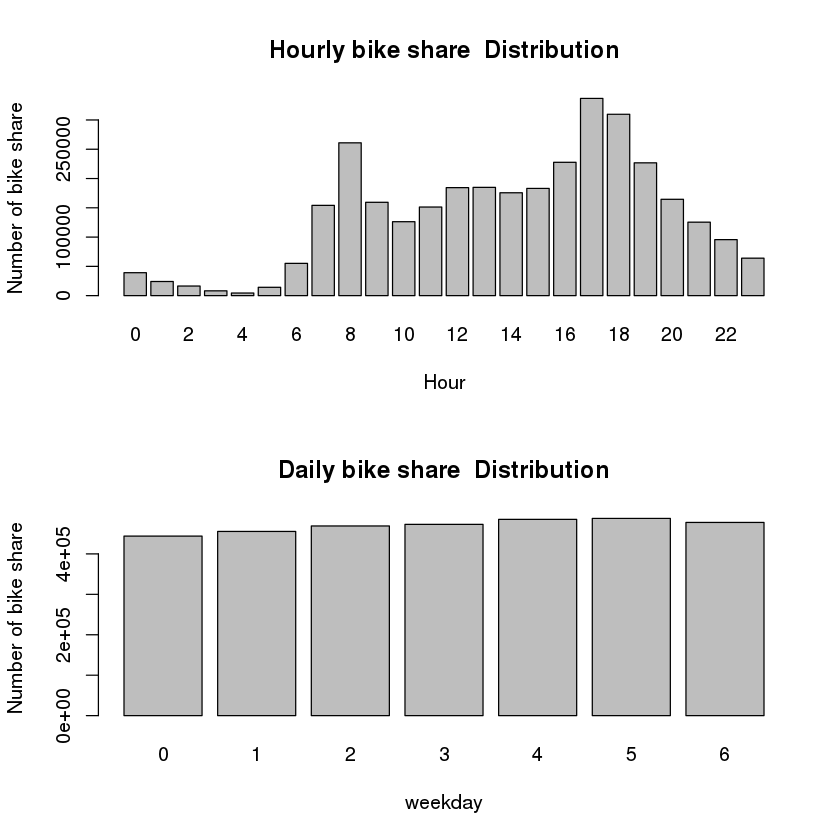

In [127]:
# Code for activity 12 goes gere 
#layout(c(1,2))
par(mfrow=c(2,1))
barplot(hour_sums, main="Hourly bike share  Distribution",ylab="Number of bike share",xlab="Hour",
       names.arg=0:23)
barplot(day_sums, main="Daily bike share  Distribution",ylab="Number of bike share",xlab="weekday",names.arg=0:6)


The plots clearly tell, The peak hour of bike shares is 17 and 18 hours every day. While, thurdays and fridays are popular for bike shares in a week. This is contradicting with what we saw in activity 10 where average number of instances of bike shares are more on weekends. Lets see the average number of users who rent the bike on each week of the day.

[1] 444027 455503 469109 473048 485395 487790 477807

[1] 2502 2479 2453 2475 2471 2487 2512

[1] 177.4688 183.7447 191.2389 191.1305 196.4367 196.1359 190.2098

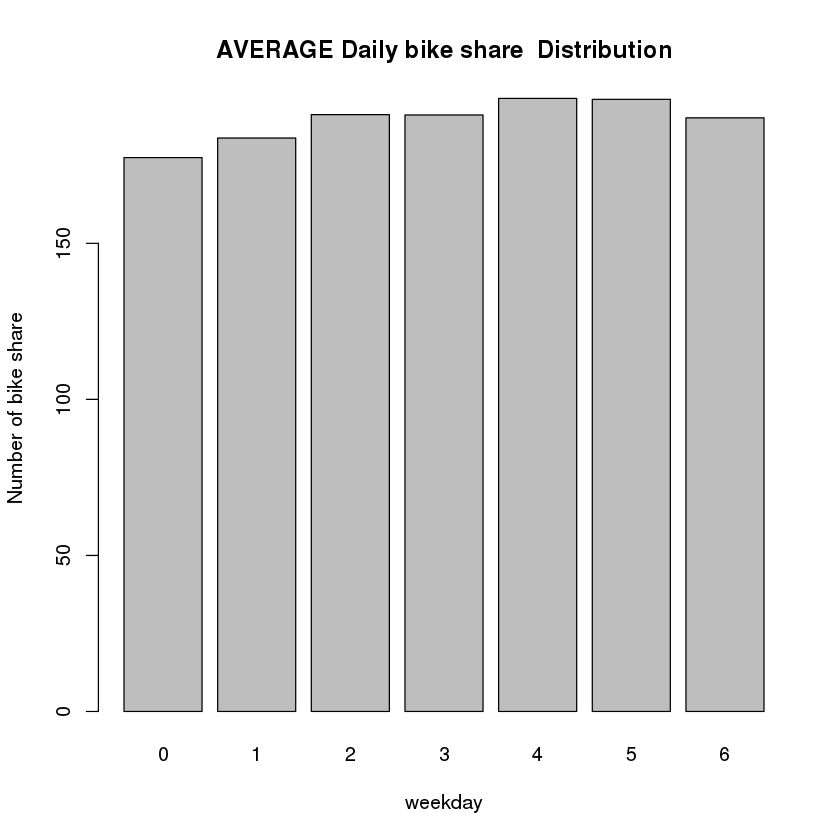

In [147]:
day_sums
nub_days=as.vector(table(bikeshare_hour$weekday))
nub_days
day_means=day_sums/nub_days
day_mean
barplot(day_means, main="Average Daily bike share  Distribution",ylab="Number of bike share",xlab="weekday",names.arg=0:6)

**Activity 13: ** Plot a boxplot for `cnt` against each weekday

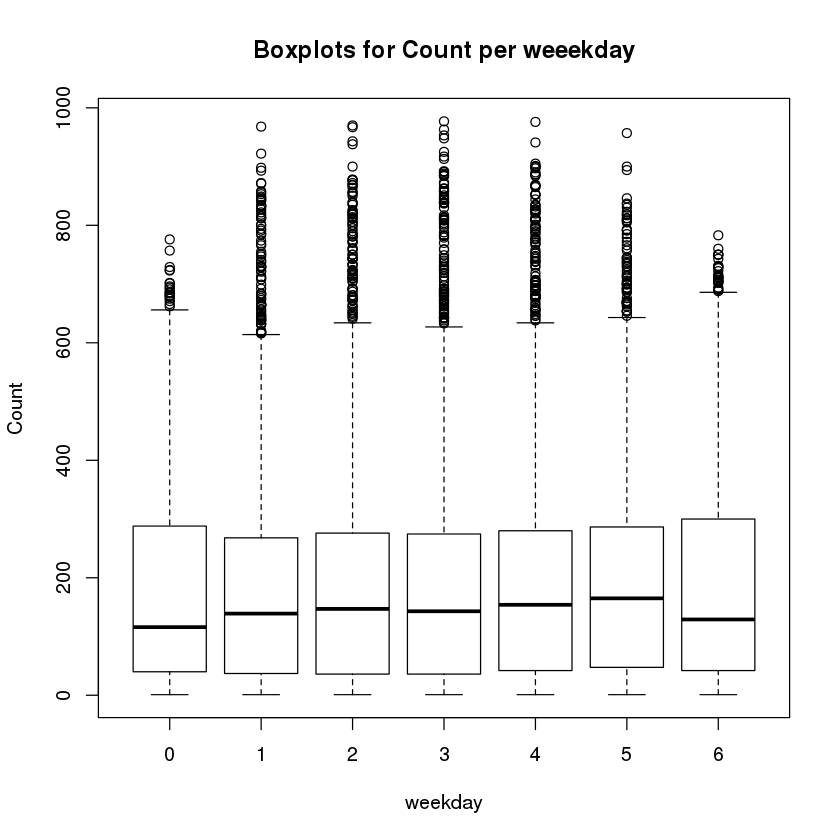

In [149]:
#Code for activity 13 goes here.........
boxplot(cnt~weekday,data=bikeshare_hour, main="Boxplots for Count per weeekday", 
  	xlab="weekday", ylab="Count")

** Activity 14: ** Plot histograms for variables `casual`, `registered` and `cnt` variables and see how they are distributed.  
Plot mean and median on the histograms. 

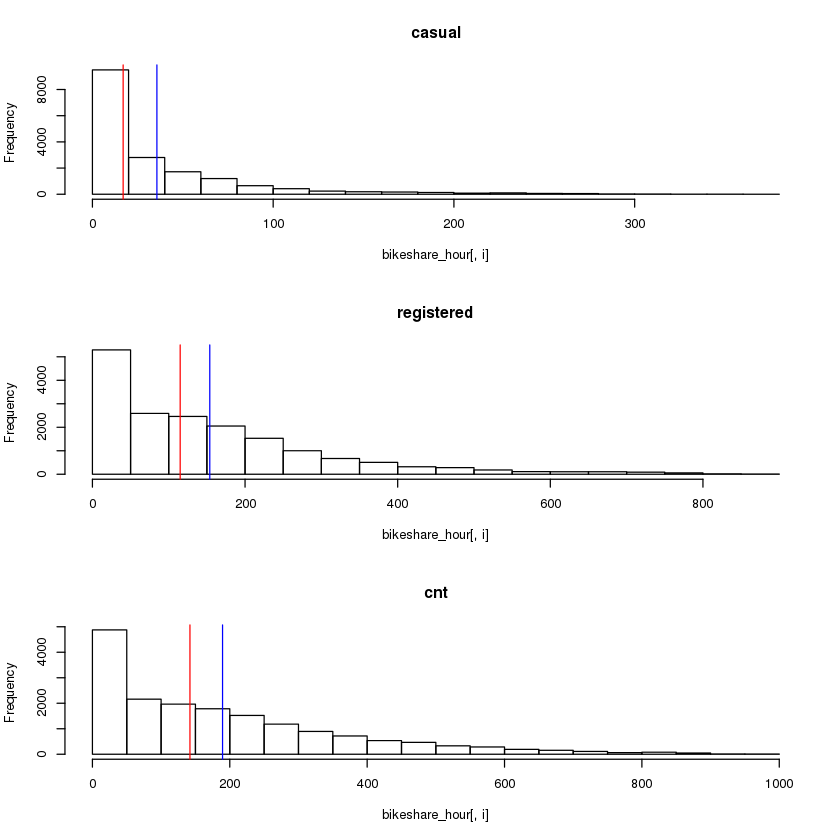

In [169]:
#Code for activity 14 goes here
par(mfrow=c(3, 1))
colnames <- colnames(bikeshare_hour)
for (i in 15:17) {
hist(bikeshare_hour[,i], main=colnames[i], probability=FALSE)
abline(v=c(mean(bikeshare_hour[,i]),median(bikeshare_hour[,i])),col=c("blue","red"))
   
}


# SAVE YOUR NOTEBOOK

The next cell is the final commit of work!

In [ ]:
# SAVE NOTEBOOK BEFORE RUNNING CELL
library(git2r)
repo <- repository('../../..')
add(repo, 'exercises.ipynb')   # Yes we add it again... we have another round of changes to record
commit(repo,"Activities 11-14")

# Let's look at the history of our work
summary(repo)